In [3]:
#Importing Libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [4]:
#Declaring Start Date and End Date
style.use('ggplot')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2019,12,31)

In [5]:
##scraping stock data of company using yahoo finance(cna use google or morning star)
def comp_scraper(company_name):
    df=web.DataReader(company_name, 'yahoo', start, end)
    df['comp']=company_name
    return (df)

In [6]:
data_df=pd.DataFrame()

In [7]:
#Data scraping for Apple,IBM,Microsoft,Walmart
company_list=['AAPL', 'IBM', 'MSFT', 'WMT']
for company in company_list:
    df=comp_scraper(company)
    data_df=data_df.append(df)


In [8]:
##checking shape of data frame
data_df.shape

(3016, 7)

In [9]:
data_df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'comp'], dtype='object')

In [10]:
#x=data.groupby('comp')['Volume'].mean()
data_df.head()

,High,Low,Open,Close,Volume,Adj Close,comp
Date,,,,,,,
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,110.691154,AAPL
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,110.567276,AAPL
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.129562,AAPL
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.368469,AAPL
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,113.397697,AAPL


In [11]:
## cheking information of all columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3016 entries, 2017-01-03 to 2019-12-31
Data columns (total 7 columns):
High         3016 non-null float64
Low          3016 non-null float64
Open         3016 non-null float64
Close        3016 non-null float64
Volume       3016 non-null float64
Adj Close    3016 non-null float64
comp         3016 non-null object
dtypes: float64(6), object(1)
memory usage: 188.5+ KB


In [12]:
# Statastics
data_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3016.000000,3016.000000,3016.000000,3016.000000,3.016000e+03,3016.000000
mean,131.792440,129.765922,130.787510,130.812033,1.713805e+07,125.676272
std,43.599498,42.869276,43.217224,43.265654,1.406598e+07,42.479639
min,62.660000,61.950001,62.189999,62.299999,1.193000e+06,58.868710
25%,96.817499,95.227503,96.010002,96.094999,5.316575e+06,92.887165
50%,134.669998,132.805000,133.895004,133.924995,1.470155e+07,128.234177
75%,155.742504,153.622498,154.562504,154.682495,2.505285e+07,145.827290
max,293.970001,289.519989,291.119995,293.649994,1.119850e+08,292.954712


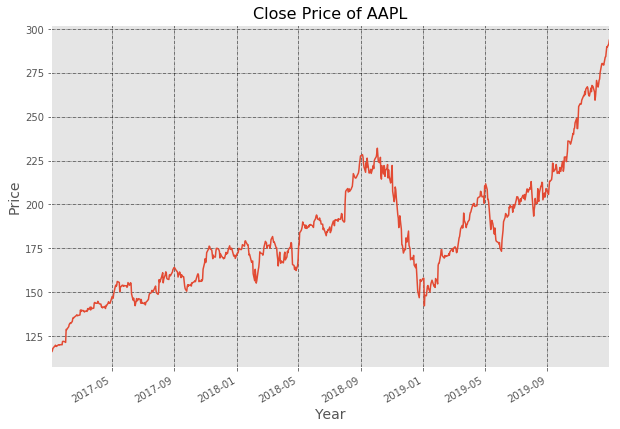

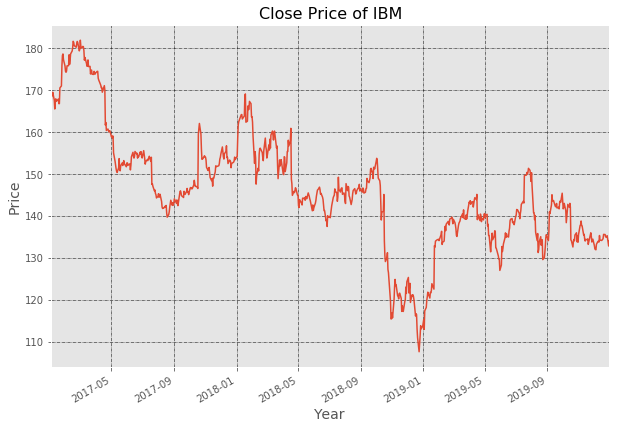

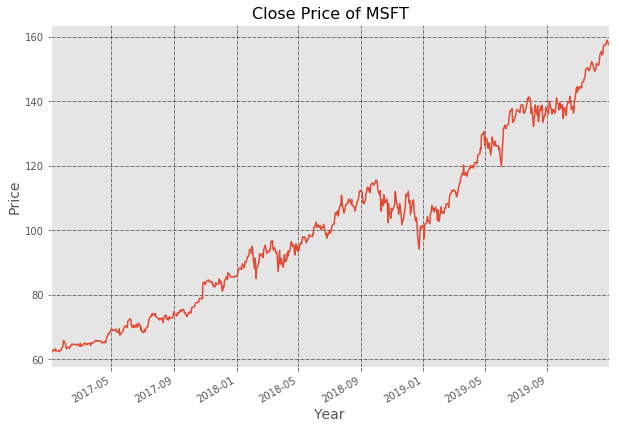

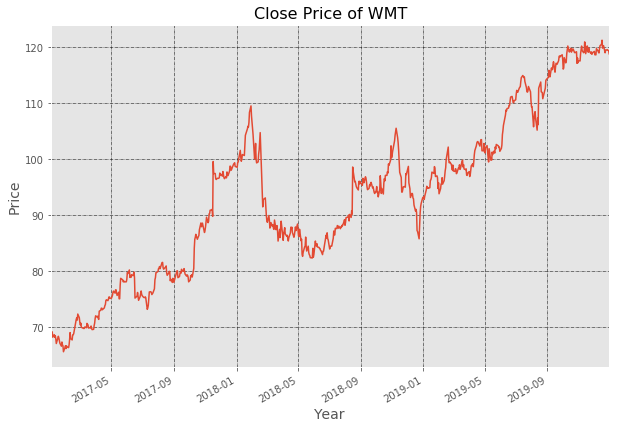

In [13]:
#plotting close price of each company for Analysis
for company in company_list:
    
    x=data_df[data_df['comp']==company]
    x['Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
    plt.title("Close Price of %s" % company, fontsize=16)
# Define the labels for x-axis and y-axis
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('Year', fontsize=14)
# Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
    plt.show()

In [14]:
#fetch data from quandl API
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']
# Import pandas
data = pd.DataFrame(columns=tickers_list)
# Feth the data
for ticker in tickers_list:
    data[ticker] = quandl.get('WIKI/' + ticker, start_date=start,
    end_date=end, api_key='YfzxefERAEGTD3SgYuXo')['Close']
# Print first 5 rows of the data
data.head()

,AAPL,IBM,MSFT,WMT
Date,,,,
2017-01-03,116.15,167.19,62.58,68.66
2017-01-04,116.02,169.26,62.30,69.06
2017-01-05,116.61,168.70,62.30,69.21
2017-01-06,117.91,169.53,62.84,68.26
2017-01-09,118.99,167.65,62.64,68.71


In [15]:
data.tail()

,AAPL,IBM,MSFT,WMT
Date,,,,
2018-03-21,171.270,156.69,92.48,88.18
2018-03-22,168.845,152.09,89.79,87.14
2018-03-23,164.940,148.89,87.18,85.42
2018-03-26,172.770,153.37,93.78,87.50
2018-03-27,168.340,151.91,89.47,86.05


In [16]:
### Comaritive Analysis

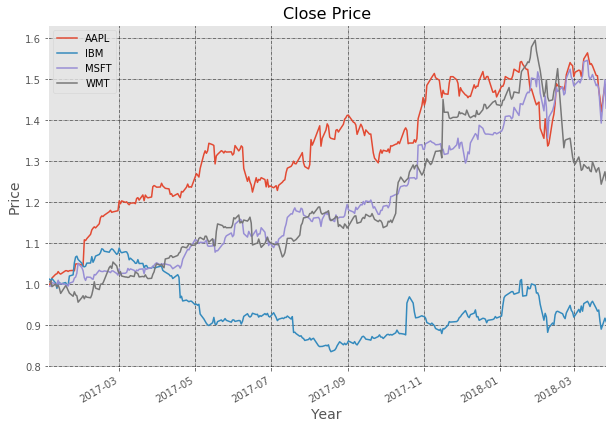

In [17]:
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
#plt.title(“Adjusted Close Price”, fontsize=16)
# Define the labels for x-axis and y-axis
#plt.ylabel(‘Price’, fontsize=14)
#plt.xlabel(‘Year’, fontsize=14)
# Plot the grid lines
#plt.grid(which=”major”, color=’k’, linestyle=’-.’, linewidth=0.5)
plt.title("Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [18]:
data_df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'comp'], dtype='object')

In [19]:
#### function to predict stock for each company########

In [20]:
def predict(company_name):
    data_comp=data_df[data_df['comp']==company_name]
    data = data_comp.sort_index(ascending=True, axis=0)
    data['Date']=data.index
#creating a separate dataset
    new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]
    ###creating features
    new_data.index=new_data['Date']
    new_data['days']=new_data['Date'].apply(lambda x:x.weekday())

    new_data['year']=new_data['Date'].apply(lambda x:x.year)

    new_data['month']=new_data['Date'].apply(lambda x:x.month)
    new_data['day']=new_data['Date'].apply(lambda x:x.day)
    new_data['Dayofyear']=new_data['Date'].apply(lambda x:x.dayofyear)
    #new_data['Dayofweek']=new_data['Date'].apply(lambda x:x.dayofweek)


    new_data['quarter']=new_data['Date'].apply(lambda x:x.quarter)

    new_data['semester'] = np.where(new_data.quarter.isin([1,2]),1,2)
    new_data['weekofyear']=new_data['Date'].apply(lambda x:x.weekofyear)
    new_data.drop("Date",1,inplace=True)
    x=int(0.7*len(new_data))
    train = new_data[:x]
    valid = new_data[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']

#implement linear regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print(rms)
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = new_data[x:].index
    train.index = new_data[:x].index
    plt.figure(figsize=(5,5))
    plt.plot(train['Close'],label=company_name)
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel("year")
    plt.ylabel("Close")
    plt.xticks(rotation=45)
    plt.legend()

24.064164563754012


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


18.244619613160708


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


9.38954955593752


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7.196352922612782


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


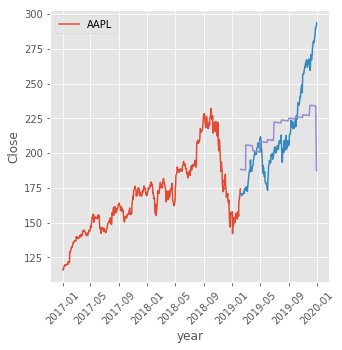

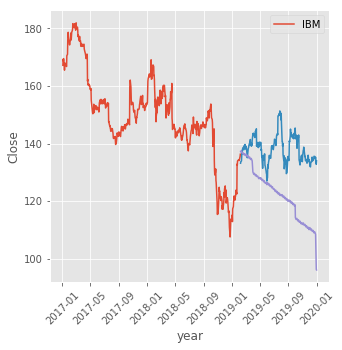

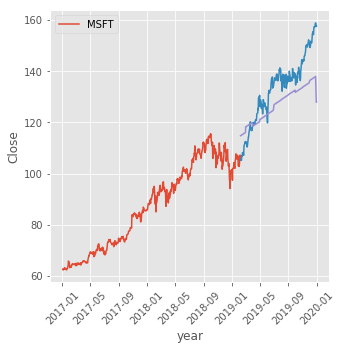

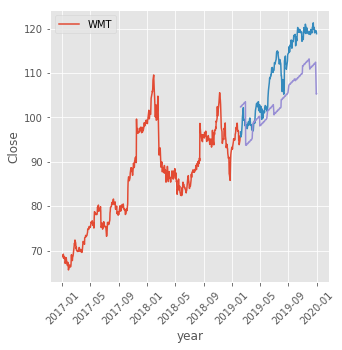

In [21]:
for company in company_list:
    predict(company)

In [160]:
####Applying models on Walmart stock data

In [264]:
##filter data of Walmart company
df_WMT=data_df[data_df['comp']=='WMT']

In [265]:
##checking shape of data
df_WMT.shape

(754, 7)

In [266]:
###checking for missing value
#df_WMT.isnull().sum()

In [267]:
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    nulls

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

predictors=fill_null_values(df_WMT,0)

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
comp         0
dtype: int64


In [268]:
df_WMT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2017-01-03 to 2019-12-31
Data columns (total 7 columns):
High         754 non-null float64
Low          754 non-null float64
Open         754 non-null float64
Close        754 non-null float64
Volume       754 non-null float64
Adj Close    754 non-null float64
comp         754 non-null object
dtypes: float64(6), object(1)
memory usage: 47.1+ KB


In [269]:
df_WMT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,93.938554,92.590305,93.243196,93.266035,8.133748e+06,90.549899
std,14.708024,14.488045,14.642937,14.591007,4.847556e+06,15.772706
min,66.480003,65.279999,65.629997,65.660004,2.227400e+06,61.280365
25%,81.410002,80.540001,81.062498,80.794998,5.652500e+06,76.875786
50%,95.314999,93.820000,94.514999,94.564999,7.075600e+06,92.022678
75%,102.787502,100.775000,101.864998,101.947500,9.147700e+06,100.122688
max,125.379997,120.699997,124.599998,121.279999,5.623300e+07,121.279999


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]), <a list of 10 Text xticklabel objects>)

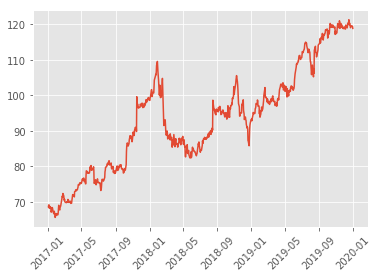

In [270]:
##plotting close price
plt.plot(df_WMT['Close'])
plt.xticks(rotation=45)

In [168]:
### Outlier Detection### will not replace or remove Outlier as their may be some reason or event...

In [271]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df_WMT)

High --------- 0
Low --------- 0
Open --------- 0
Close --------- 0
Volume --------- 44
Adj Close --------- 0


In [273]:
df_WMT['Date']=df_WMT.index

C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


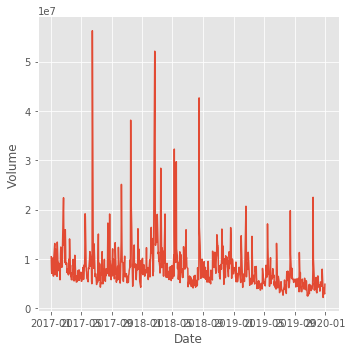

In [274]:
sns.relplot(x='Date', y="Volume",kind="line", data=df_WMT)

In [172]:
###Feature Creation using date, dropping all other columns

In [275]:
data = df_WMT.sort_index(ascending=True, axis=0)
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    ###creating features
new_data['days']=new_data['Date'].apply(lambda x:x.weekday())
new_data['year']=new_data['Date'].apply(lambda x:x.year)
new_data['month']=new_data['Date'].apply(lambda x:x.month)
#new_data['day']=new_data['Date'].apply(lambda x:x.day)
new_data['Dayofyear']=new_data['Date'].apply(lambda x:x.dayofyear)
new_data['Dayofweek']=new_data['Date'].apply(lambda x:x.dayofweek)
new_data['quarter']=new_data['Date'].apply(lambda x:x.quarter)
new_data['semester'] = np.where(new_data.quarter.isin([1,2]),1,2)
new_data['weekofyear']=new_data['Date'].apply(lambda x:x.weekofyear)
#new_data.drop("Date",1,inplace=True)

In [276]:
new_data.shape

(754, 10)

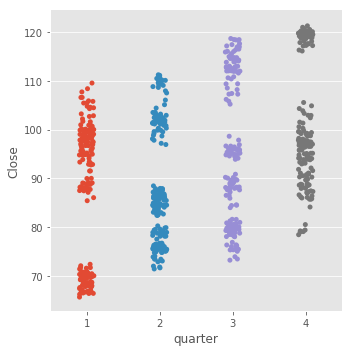

In [277]:
sns.catplot(x='quarter', y="Close", data=new_data)

In [278]:
new_data['Close']=new_data['Close'].astype(float)

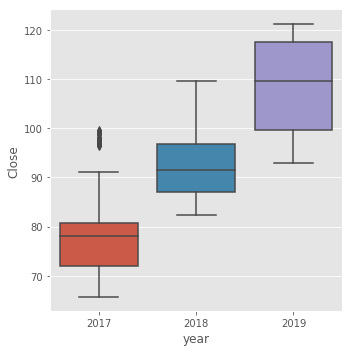

In [279]:
sns.catplot(x="year", y="Close", kind="box", data=new_data)

In [ ]:
###outliers in year 2017###

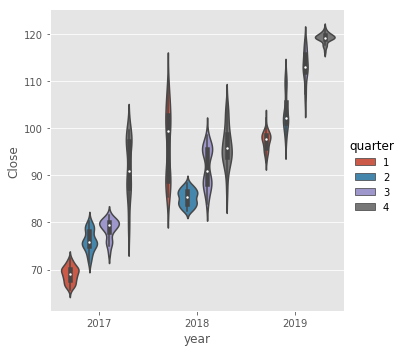

In [280]:
sns.catplot(x="year", y="Close", hue="quarter",
            kind="violin", data=new_data)

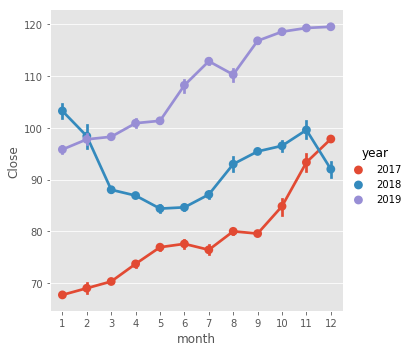

In [297]:
sns.catplot(x="month", y="Close", hue="year", kind="point", data=new_data)

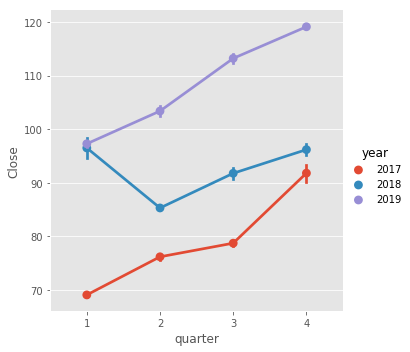

In [281]:
sns.catplot(x="quarter", y="Close", hue="year", kind="point", data=new_data)

In [282]:
new_data=new_data.set_index("Date")

In [283]:
new_data.columns

Index(['Close', 'days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter',
       'semester', 'weekofyear'],
      dtype='object')

Highly Correlated Variables


year        Close         0.824671
Close       year          0.824671
semester    weekofyear    0.852909
weekofyear  semester      0.852909
semester    Dayofyear     0.866367
Dayofyear   semester      0.866367
month       semester      0.867426
semester    month         0.867426
            quarter       0.893712
quarter     semester      0.893712
            weekofyear    0.949955
weekofyear  quarter       0.949955
Dayofyear   quarter       0.968064
quarter     Dayofyear     0.968064
month       quarter       0.971184
quarter     month         0.971184
month       weekofyear    0.974514
weekofyear  month         0.974514
            Dayofyear     0.976130
Dayofyear   weekofyear    0.976130
            month         0.996480
month       Dayofyear     0.996480
dtype: float64

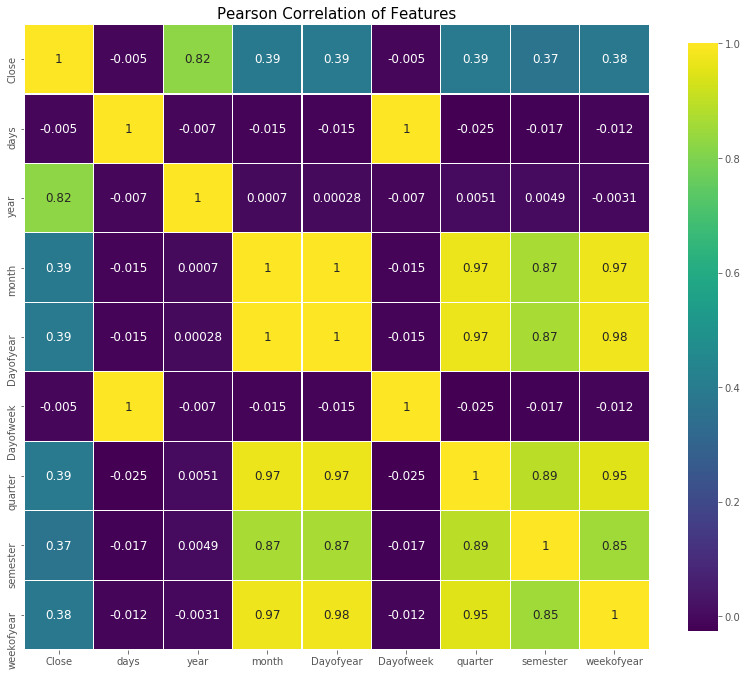

In [284]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(new_data)


In [293]:
### Baseline Model

Stock forcast for Walmart  using LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


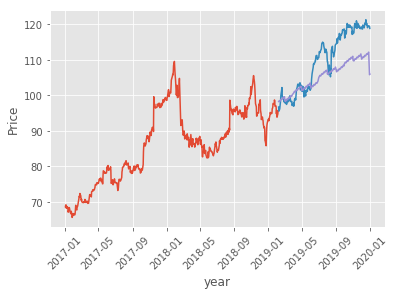

C:\Users\Anupriya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Stock forcast for Walmart  using SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


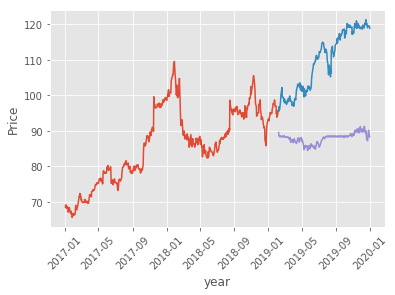

In [286]:
def run_model(dataframe, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    dataframe=dataframe.sort_index(ascending=True, axis=0)
    x=int(0.7*len(dataframe))
    train = dataframe[:x]
    valid = dataframe[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = dataframe[x:].index
    train.index = dataframe[:x].index
    
   
    print("Stock forcast for Walmart  using "+str(model))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel("year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    #plt.legend()
    plt.show()
    
###Applying Models
models = [LinearRegression,SVR] #KNeighborsRegressor]
for model in models:
    # run model
    model = model()
    run_model(new_data, model) # train and returns AUC test score
   

In [287]:
### Feature Selection

In [288]:
def feature_selection(dataframe,target,number_of_features,model):
    X = dataframe
    y = target

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    print('Features  to be selected for {}'.format(str(models)))
    features = pd.Series(rfe.ranking_, index=X.columns)
    print(features[features.values==1].index.tolist())
    print('===='*30)

# Choosing the models
models = [LinearRegression,SVR]


    

In [189]:
X_train=new_data.drop("Close",1)
y_train=new_data['Close']
# Selecting 8 number of features
for i in models:
    feature_selection(X_train,y_train,8,i)

Features  to be selected for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear']
Features  to be selected for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear']


C:\Users\Anupriya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [289]:
###Using first 8 features
new_data=new_data[['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter', 'semester', 'weekofyear',"Close"]]

In [290]:
new_data.columns

Index(['days', 'year', 'month', 'Dayofyear', 'Dayofweek', 'quarter',
       'semester', 'weekofyear', 'Close'],
      dtype='object')

In [ ]:
### Hypertuning using GridSearchCV on Linear Regression

In [294]:
def gridcv(dataframe):
    dataframe=dataframe.sort_index(ascending=True, axis=0)
    x=int(0.7*len(dataframe))
    train = dataframe[:x]
    valid = dataframe[x:]

    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']

    model =LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid = GridSearchCV(model,parameters, cv=None)
    grid.fit(x_train, y_train)
    preds=grid.predict(x_valid)
    print ("r2 / variance : ", grid.best_score_)
    print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(x_valid) - y_valid) ** 2))
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    valid.index = dataframe[x:].index
    train.index = dataframe[:x].index
    
   
    plt.title("Close Price")
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel("year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    #plt.legend()
    plt.show()

C:\Users\Anupriya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Anupriya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2 / variance :  -5.109508486041523
Residual sum of squares: 39.63


C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anupriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


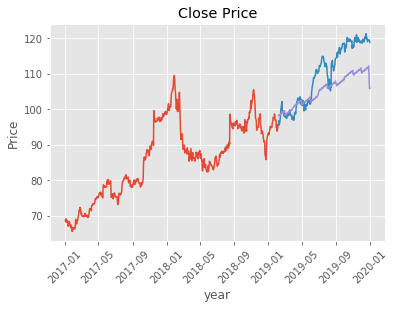

In [295]:
gridcv(new_data)